Computing Returns - Shiller S&P 500 Data

(Applicable to any historical price dataset)

http://www.econ.yale.edu/~shiller/data/ie_data.xls

<Axes: title={'center': 'S&P 500 Price History'}>

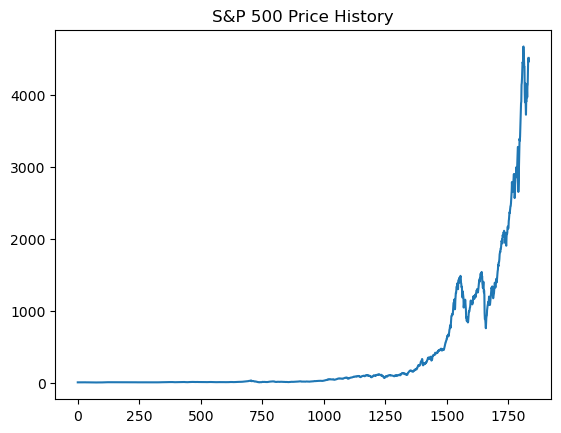

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import date
import mplfinance as mpf

SP500 = pd.read_excel('ie_data.xls', 'Data', header=7, skipfooter=1)
SP500['P'].plot(title="S&P 500 Price History")

In [3]:
pd.to_datetime(SP500['Date'].astype(str), format="%Y.%m").tail(15)
year=np.floor(SP500['Date'])
month=(SP500['Date']-year)*100
SP500.set_index(pd.to_datetime({'year': year, 'month': month, 'day':1}), inplace=True)

Monthly SP500 Returns & Historical Averages

In [10]:
SP500['P_lag1']=SP500['P'].shift(1)
SP500['Return']=(SP500['P']+(SP500['D']/12)-SP500['P_lag1'])/SP500['P_lag1']

SP500['Return'].describe()

count    1829.000000
mean        0.008156
std         0.040604
min        -0.261879
25%        -0.011400
50%         0.009889
75%         0.030863
max         0.513085
Name: Return, dtype: float64

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   8.,   8.,   9.,
         15.,  28.,  55.,  97., 187., 302., 346., 344., 236.,  95.,  56.,
         17.,   7.,   7.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.26187924, -0.24637995, -0.23088065, -0.21538136, -0.19988206,
        -0.18438277, -0.16888347, -0.15338418, -0.13788488, -0.12238559,
        -0.10688629, -0.091387  , -0.07588771, -0.06038841, -0.04488912,
        -0.02938982, -0.01389053,  0.00160877,  0.01710806,  0.03260736,
         0.04810665,  0.06360595,  0.07910524,  0.09460454,  0.11010383,
         0.12560313,  0.14110242,  0.15660172,  0.17210101,  0.18760031,
         0.2030996 ,  0.2185989 ,  0.23409819,  0.24959748,  0.26509678,
         0.28059607,  0.29609537,  0.31159466,  0.32709396,  0.34259325,
         0.35809255,  0.37359184,  0.38909114,  0.40459043,  0.42008973,
 

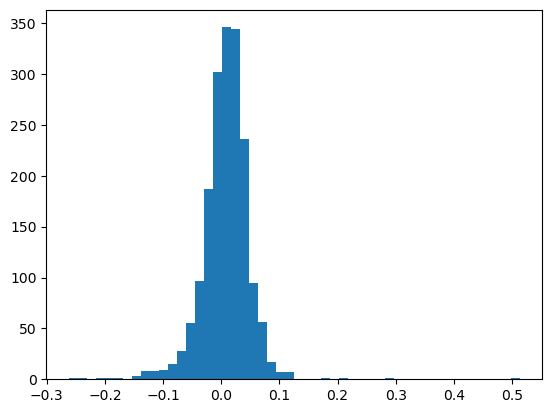

In [13]:
plt.hist(SP500['Return'], bins=50)

Random Variables, Normal Distributions, Central Limit Theorem

(array([ 9907., 10172.,  9924.,  9922., 10009., 10067.,  9873.,  9984.,
        10064., 10078.]),
 array([9.93922055e-06, 1.00008602e-01, 2.00007264e-01, 3.00005927e-01,
        4.00004589e-01, 5.00003252e-01, 6.00001914e-01, 7.00000577e-01,
        7.99999239e-01, 8.99997902e-01, 9.99996564e-01]),
 <BarContainer object of 10 artists>)

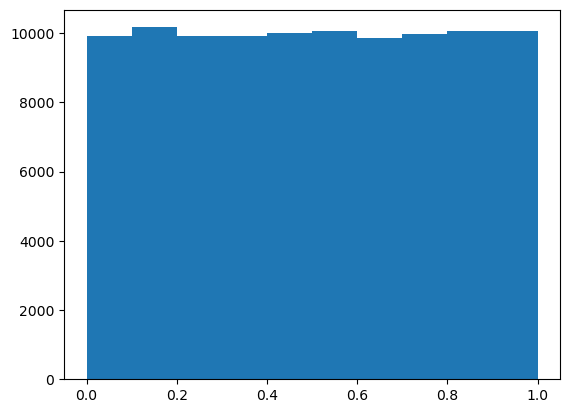

In [14]:
myuni=np.random.uniform(0,1,100000)
plt.hist(myuni)

(array([3.500e+01, 1.800e+02, 6.140e+02, 1.200e+03, 1.413e+03, 9.580e+02,
        4.470e+02, 1.270e+02, 2.500e+01, 1.000e+00]),
 array([0.47168724, 0.47826375, 0.48484026, 0.49141677, 0.49799328,
        0.50456979, 0.5111463 , 0.51772282, 0.52429933, 0.53087584,
        0.53745235]),
 <BarContainer object of 10 artists>)

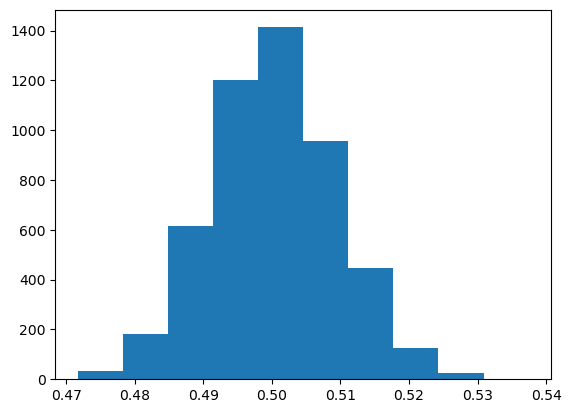

In [17]:
mysample=np.random.choice(myuni,1000)
Nsamples=5000

samplemeans=np.zeros(Nsamples)
for i in range(Nsamples):
    mysample=np.random.choice(myuni,1000)
    samplemeans[i]=mysample.mean()

plt.hist(samplemeans)

In [18]:
sd = date(2020, 1, 1)
ed = date(2025, 1, 1)

AMD=yf.download("AMD", sd, ed)
AMDmonthlyprc=AMD.resample('M').last()

C:\Users\holde\AppData\Local\Temp\ipykernel_30732\401868141.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  AMD=yf.download("AMD", sd, ed)
[*********************100%***********************]  1 of 1 completed
C:\Users\holde\AppData\Local\Temp\ipykernel_30732\401868141.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  AMDmonthlyprc=AMD.resample('M').last()


In [19]:
AMDmonthlyprc.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,AMD,AMD,AMD,AMD,AMD
Date,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN
2020-02-29,-0.032340,-0.050021,-0.122890,-0.145455,0.663259
2020-03-31,0.000000,0.051571,0.100390,0.158849,-0.167924
2020-04-30,0.151935,0.118690,0.152126,0.114751,-0.214890
2020-05-31,0.026914,-0.009026,-0.003460,-0.025454,-0.013383
2020-06-30,-0.022119,-0.019145,-0.019865,-0.017476,-0.346252
2020-07-31,0.471773,0.496305,0.482881,0.537725,0.694155
2020-08-31,0.172930,0.173252,0.128583,0.081098,0.265762


C:\Users\holde\AppData\Local\Temp\ipykernel_30732\169037842.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dailyprc=yf.download(tickers, sd, ed)['Close']
[*********************100%***********************]  7 of 7 completed
C:\Users\holde\AppData\Local\Temp\ipykernel_30732\169037842.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label,(sigmas[i], means[i]))


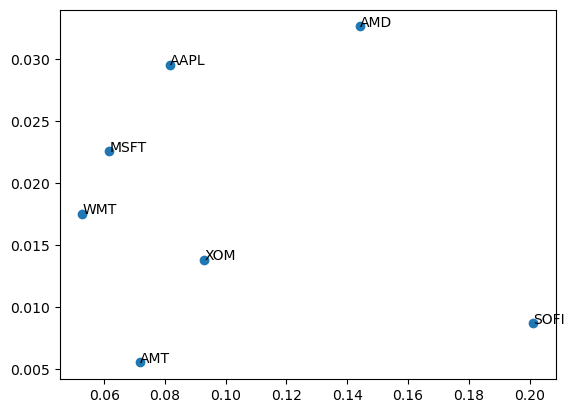

In [25]:
tickers = ['AMD', 'AAPL', 'MSFT', 'WMT', 'XOM', 'SOFI', 'AMT']
sd=date(2019,1,1)
ed=date(2025,1,1)
dailyprc=yf.download(tickers, sd, ed)['Close']

monthlyprc=dailyprc.resample('ME').last()
monthlyret=monthlyprc.pct_change()

means = np.mean(monthlyret, axis=0)
sigmas=np.std(monthlyret, axis=0)
plt.scatter(sigmas, means)
for i in range(len(means)):
    label=means.index[i]
    plt.annotate(label,(sigmas[i], means[i]))

In [24]:
means

Ticker
AAPL    0.029531
AMD     0.032625
AMT     0.005506
MSFT    0.022557
SOFI    0.008676
WMT     0.017495
XOM     0.013782
dtype: float64

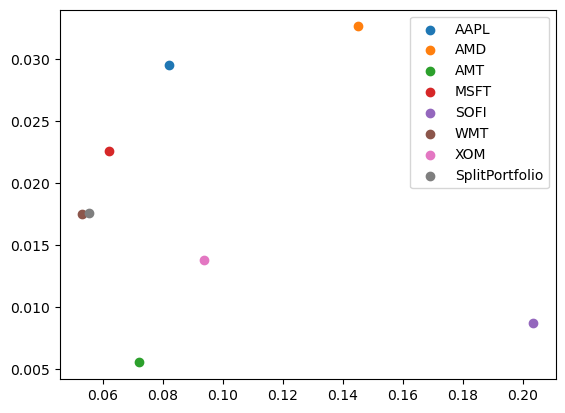

In [31]:
msft_shares = 500 / dailyprc['MSFT'].values[0]
xom_shares  = 500 / dailyprc['XOM'].values[0]

monthlyprc['SplitPortfolio']=msft_shares*monthlyprc['MSFT']+xom_shares*monthlyprc['XOM']
monthlyret=monthlyprc.pct_change()

for x in monthlyret.columns:
    plt.scatter(monthlyret[x].std(), monthlyret[x].mean(), label=x)
plt.legend()
plt.show()